# Valuation of currencies against a currency basket 
This code simply converts two currency pairs (B/A and C/A) to C/B.
Whereby B or C could also be a basket of currencies which makes it possible
to determine the value of a single currency against a broader basket of other currencies.

_(Don't compare a currency against a basket that contains the currency itself!)_

__The following USD denominated baskets are provided by FRED and can be used for comparison:__

__DTWEXM__ Trade Weighted U.S. Dollar Index: Major Currencies

__DTWEXO__ Trade Weighted U.S. Dollar Index: Other Important Trading Partners

__DTWEXB__ Trade Weighted U.S. Dollar Index: Broad

__List of available currencies for valuation__
https://fred.stlouisfed.org/categories/94

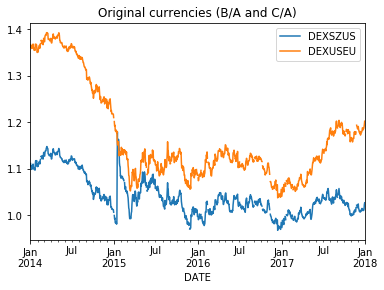

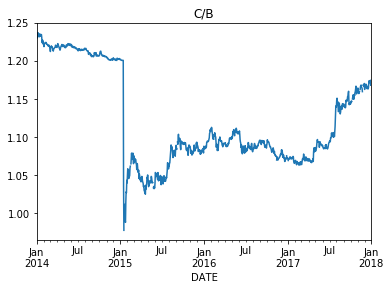

In [12]:
from pandas_datareader import data, wb
import matplotlib.pyplot as plt
import datetime

START = datetime.datetime(2014, 1, 1)
END = datetime.datetime(2018, 1, 1)

def fetchFxRates(symbol, invert=False):
    fxRates = data.DataReader(symbol, "fred", START, END)
    return fxRates if not invert else fxRates.applymap(lambda x: 1/x)

ba = fetchFxRates("DEXSZUS", True)
ca = fetchFxRates("DEXUSEU")
bc = ca.div(ba.iloc[:,0], axis='index')

baP = ba.plot.line()
ca.plot(ax=baP, title="Original currencies (B/A and C/A)")

bc.plot(title="C/B", legend=False)
plt.show()